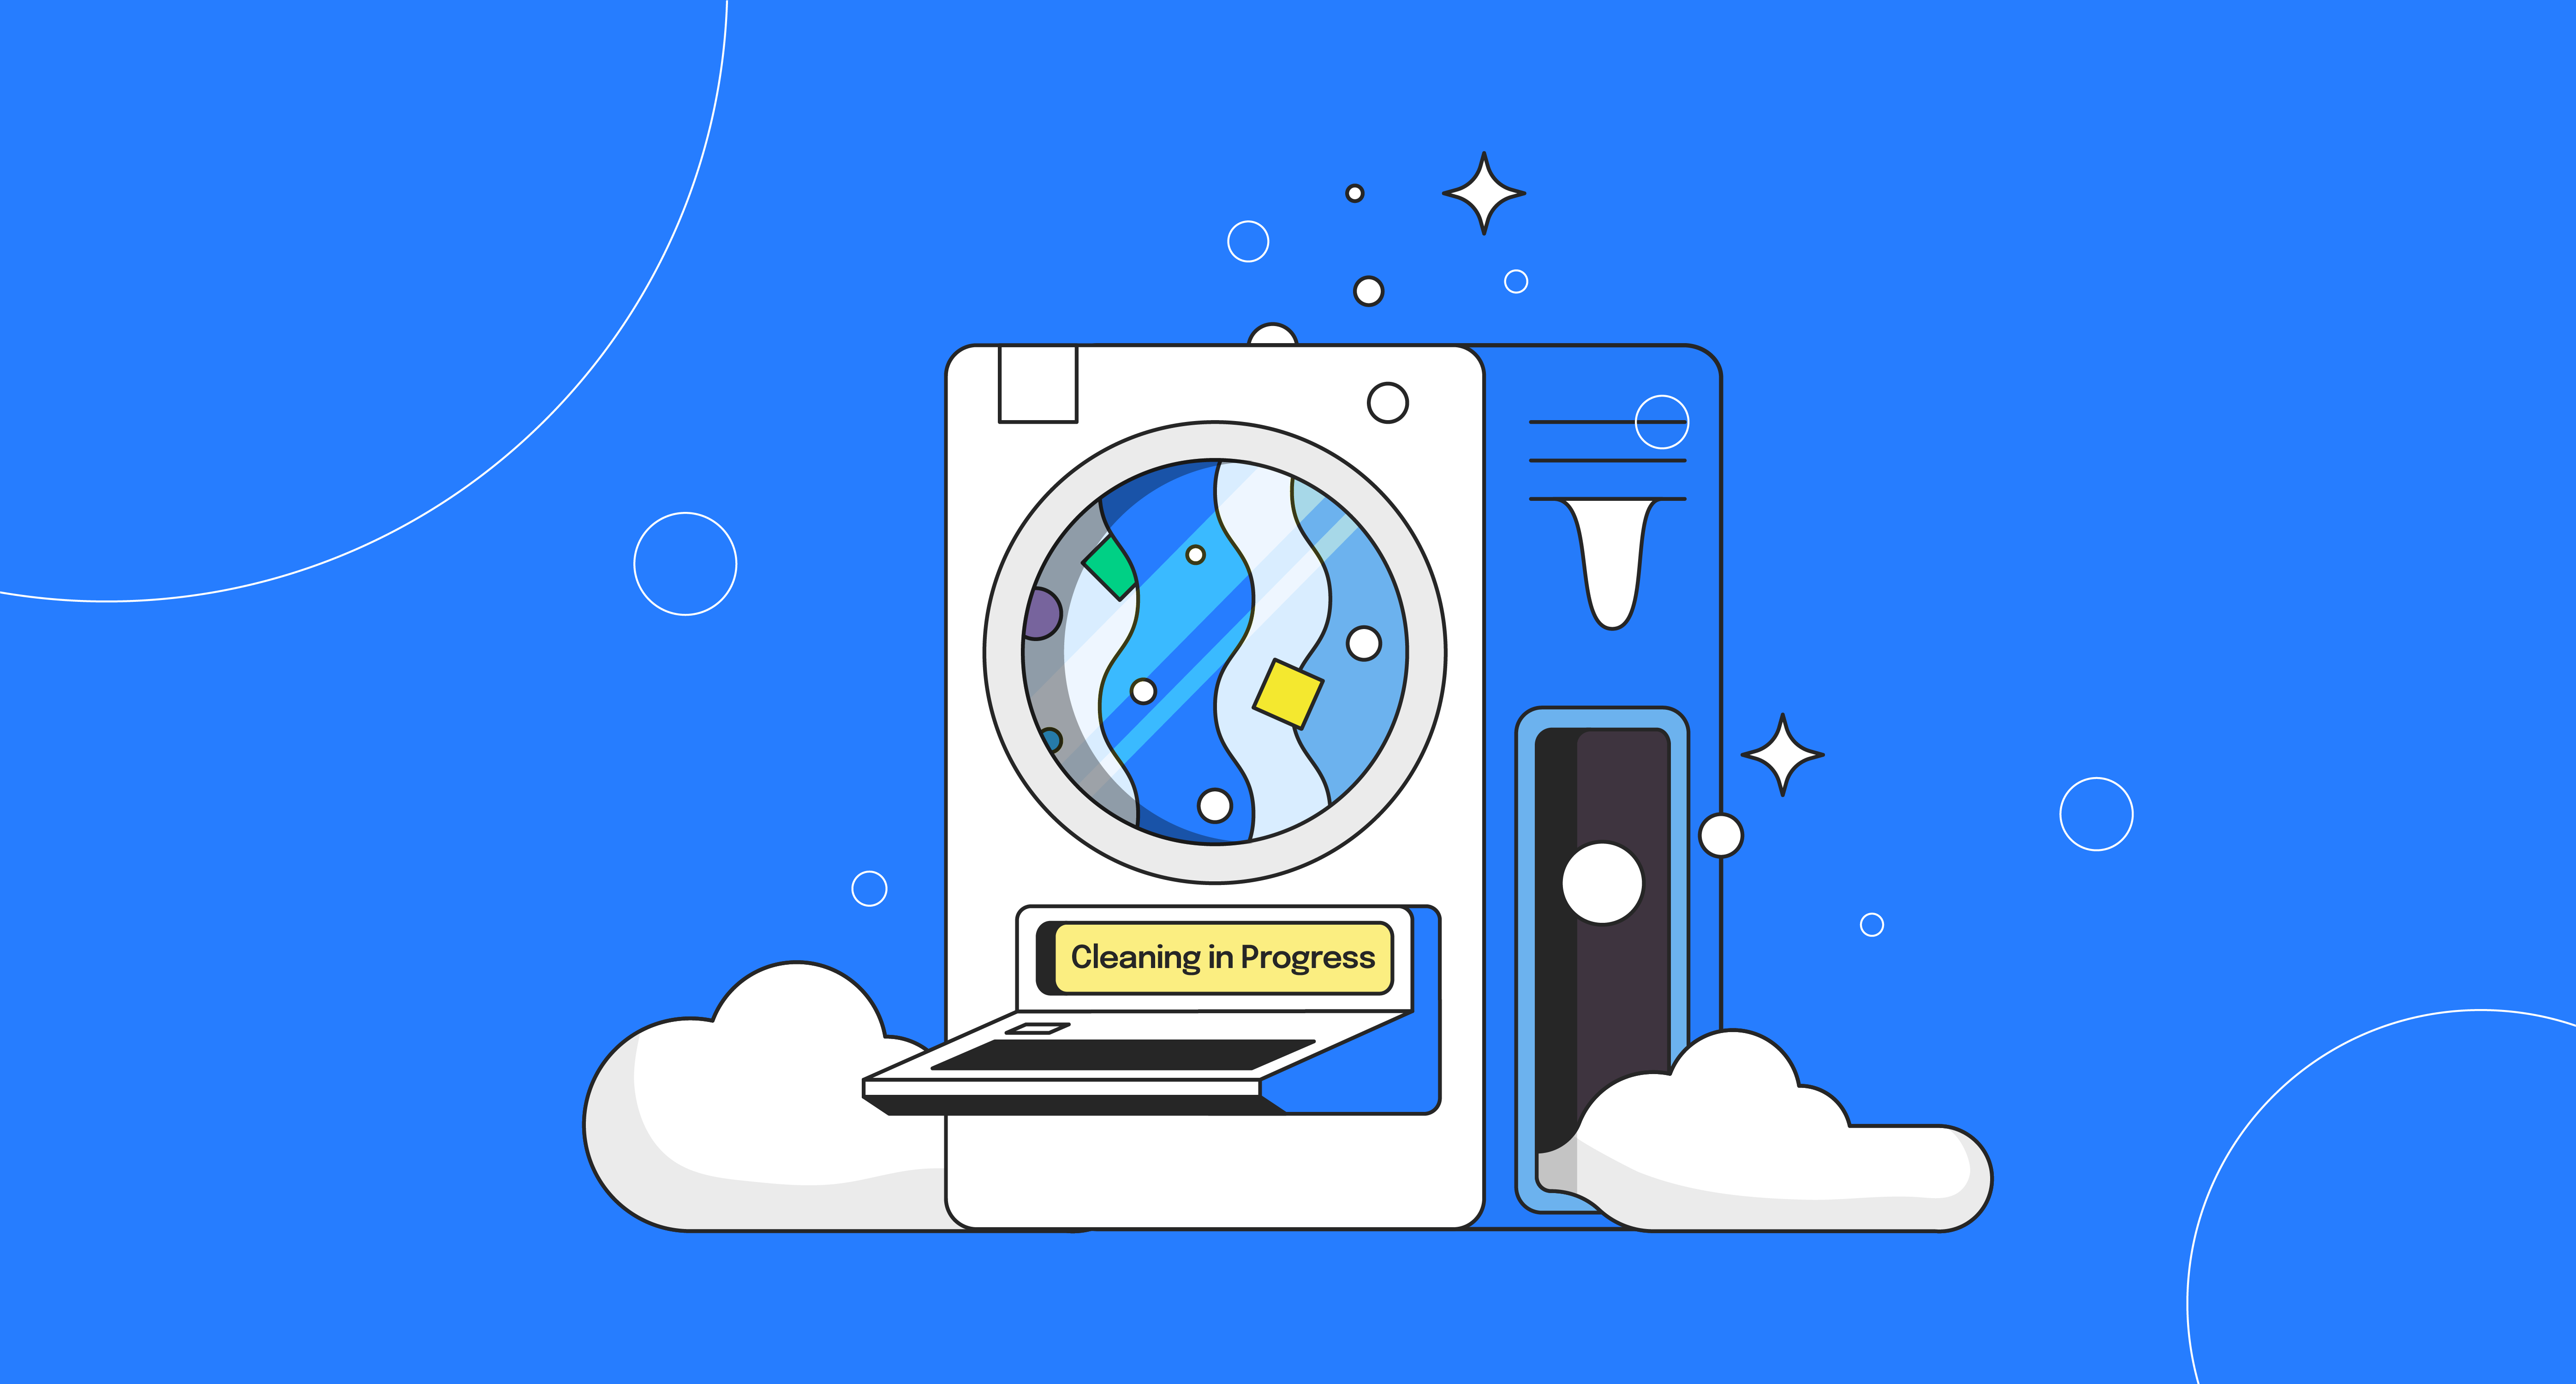

**This project's aim**, is to explore the world of Natural Language Processing (NLP) by building what is known as a Sentiment Analysis Model. A sentiment analysis model is a model that analyses a given piece of text and predicts whether this piece of text expresses positive or negative sentiment.

**Cleaning and processing** Twitter data using NLP is an essential task for extracting meaningful insights from the vast and dynamic world of social media. In this process, raw tweet data is refined through various steps such as deduplication, removal of irrelevant information.

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Trim Data
- Data Processing
- Data Cleaning
  - HTML Decoding
  - URL Links
  - Mentions
  - Hastags
  - Data Cleaning Function
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import re
import html

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import TreebankWordTokenizer

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data_raw = pd.read_csv('sentiment140.csv', encoding = "ISO-8859-1", header=None)

In [3]:
# As the data has no column titles, we will add our own
twitter_data_raw.columns = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']

In [4]:
# Show the first 5 rows of the dataframe.
twitter_data_raw.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
# Print bottom 5 rows in the dataframe.
twitter_data_raw.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,id,date,query_string,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", twitter_data_raw.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(twitter_data_raw))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(twitter_data_raw.columns))

The shape of data frame: (1600000, 6)
Number of Rows in the dataframe: 1600000
Number of Columns in the dataframe: 6


In [7]:
twitter_data_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
sentiment_counts = twitter_data_raw['sentiment'].value_counts()

In [9]:
# Print the counts and sentiment labels
print("Sentiment Distribution:")
print("Negative (0):", sentiment_counts[0])
print("Positive (4):", sentiment_counts[4])

Sentiment Distribution:
Negative (0): 800000
Positive (4): 800000


In [10]:
# Calculate and print the percentage breakdown
total_tweets = len(twitter_data_raw)
percentage_negative = (sentiment_counts[0] / total_tweets) * 100
percentage_positive = (sentiment_counts[4] / total_tweets) * 100

In [11]:
print("\nPercentage Breakdown:")
print("Negative: {:.2f}%".format(percentage_negative))
print("Positive: {:.2f}%".format(percentage_positive))


Percentage Breakdown:
Negative: 50.00%
Positive: 50.00%


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">TRIM DATA</h2>
</div>

In [12]:
# Seperating positive and negative rows
twitter_data_raw_pos = twitter_data_raw[twitter_data_raw['sentiment'] == 4]
twitter_data_raw_neg = twitter_data_raw[twitter_data_raw['sentiment'] == 0]

In [13]:
# Only retaining a fraction of the data from each output group using sample
frac = 1/4  # You can adjust this fraction as needed
twitter_data_raw_pos = twitter_data_raw_pos.sample(frac=frac, random_state=42)
twitter_data_raw_neg = twitter_data_raw_neg.sample(frac=frac, random_state=42)

In [14]:
# Concatenating both positive and negative groups and storing them back into a single dataframe
twitter_data_trim = pd.concat([twitter_data_raw_pos, twitter_data_raw_neg])

In [15]:
# Display lengths
print(len(twitter_data_raw_pos), len(twitter_data_raw_neg))
print(len(twitter_data_trim))

200000 200000
400000


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA PROCESSING</h2>
</div>

In [16]:
twitter_data_trim['Preclean_Length'] = twitter_data_trim['text'].apply(lambda x: len(x))

In [17]:
twitter_data_trim.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [18]:
twitter_data_trim.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text,Preclean_Length
1012188,4,Is lookin 4ward to a long weekend really dont want to go to work 2day tho =[ x,79
1099036,4,#myweakness Is music and i live to meet the people who make it,64
1275978,4,figured out the Internet on my new iPod,40
1388988,4,@hillsongunited can't wait to worship with you guys tonight. it'll be so much fun,82
938859,4,@sillybeggar Congrats James !! I'm sure the book is going to be a huge success,79


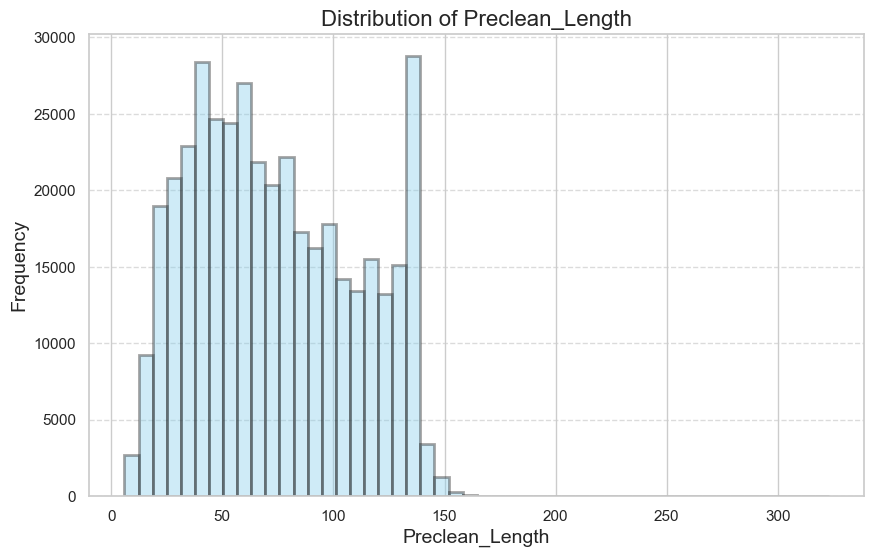

In [19]:
# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.distplot(twitter_data_trim['Preclean_Length'], kde=False, color='skyblue', hist_kws=dict(edgecolor="k", linewidth=2))

# Add labels and title
plt.title('Distribution of Preclean_Length', fontsize=16)
plt.xlabel('Preclean_Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

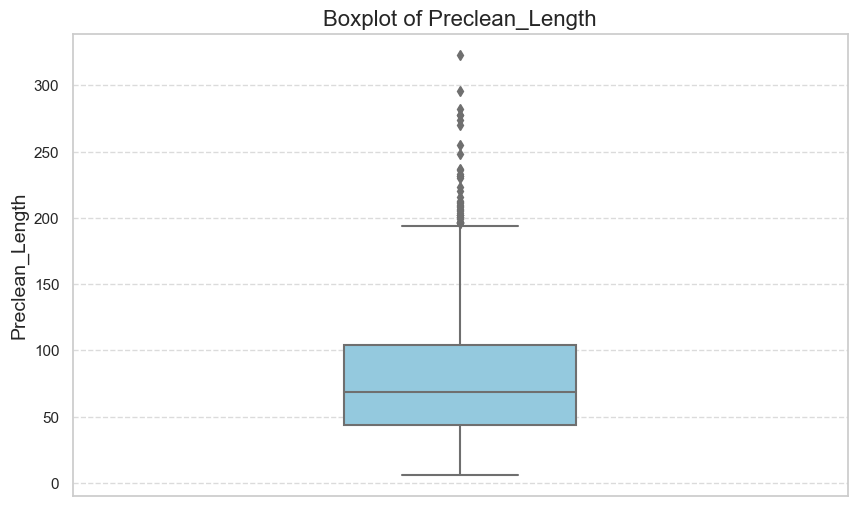

In [20]:
# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Preclean_Length', data=twitter_data_trim, color='skyblue', width=0.3)

# Add labels and title
plt.title('Boxplot of Preclean_Length', fontsize=16)
plt.ylabel('Preclean_Length', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [21]:
twitter_data_trim[twitter_data_trim['Preclean_Length']>140]

,sentiment,text,Preclean_Length
1029581,4,Night all. Only 5 hours of sleep last night &a...,143
1185915,4,@JonathanRKnight for realz! Safe travels- hope...,141
1440623,4,Just came back from watching my brothers play ...,141
1337319,4,Everybody check out @ItsTyraB's song &quot;You...,161
1427762,4,A squirrel says to a tree: &quot;I did not sto...,141
...,...,...,...
230645,0,"@ivaleriei I love that movie, never been to al...",146
93225,0,@JewelStaite &lt;small voice&gt;I sometimes si...,151
218260,0,@Talsiach I know. Weird...And I've &quot;lost&...,143
446306,0,i've possibily ruined cheese forever for my pa...,142


Hence, some tweets are more than 140 characters long. We need to clean the data.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA CLEANING</h2>
</div>

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> HTML Decoding </span>
</br>

In [22]:
twitter_data_trim['text'][248]

'Missing My BFF  watching home and away it reminds me of her and me  we &lt;3 It. shout out to u courts'

In [23]:
tweet = html.unescape(twitter_data_trim['text'][248])

In [24]:
tweet

'Missing My BFF  watching home and away it reminds me of her and me  we <3 It. shout out to u courts'

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> URL Links </span>
</br>

In [25]:
twitter_data_trim['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [26]:
re.sub('https?://[A-Za-z0-9./]+','',twitter_data_trim['text'][0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> Mentions </span>
</br>

In [27]:
twitter_data_trim['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [28]:
re.sub(r'@[A-Za-z0-9]+','', twitter_data_trim['text'][0])

" http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> Hastags </span>
</br>

In [29]:
twitter_data_trim['text'][175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [30]:
re.sub("[^a-zA-Z]", " ", twitter_data_trim['text'][175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

<br>
<span style="color: lightblue; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> Data Cleaning Function </span>
</br>

In [31]:
token = TreebankWordTokenizer()

In [32]:
mentions = r'@[A-Za-z0-9]+'
url_https = 'https?://[A-Za-z0-9./]+'
url_www = r'www.[^ ]+'

In [33]:
word = "I am a  master isn't"
lists = token.tokenize(word)
print(" ".join(lists).strip())

I am a master is n't


In [34]:
negations = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
             "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
             "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
             "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
             "mustn't":"must not"
            }

In [35]:
for a,b in negations.items():
    if a in word:
        word = word.replace(a, b)

In [36]:
word

'I am a  master is not'

In [37]:
def tweet_cleaning(text):
    text = html.unescape(text)
    text = re.sub(mentions, '', text)
    text = re.sub(url_https, '', text)
    text = re.sub(url_www, '', text)
    text = text.lower()
    for a, b in negations.items():
        if a in text:
            text = text.replace(a,b)
    #Removing characters except letters
    text = re.sub("[^a-zA-Z]", " ", text)
    #Removing unnecessary white spaces using tokenizer
    word_list = token.tokenize(text)
    text = " ".join(word_list).strip()
    return text

In [38]:
twitter_data_trim['text'] = twitter_data_trim['text'].apply(lambda x: tweet_cleaning(x))

In [39]:
twitter_data_trim.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text,Preclean_Length
1012188,4,is lookin ward to a long weekend really dont want to go to work day tho x,79
1099036,4,myweakness is music and i live to meet the people who make it,64
1275978,4,figured out the internet on my new ipod,40
1388988,4,can not wait to worship with you guys tonight it ll be so much fun,82
938859,4,congrats james i m sure the book is going to be a huge success,79


In [40]:
twitter_data_trim.drop(['Preclean_Length'], axis=1, inplace=True)

In [41]:
twitter_data_trim.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
1012188,4,is lookin ward to a long weekend really dont want to go to work day tho x
1099036,4,myweakness is music and i live to meet the people who make it
1275978,4,figured out the internet on my new ipod
1388988,4,can not wait to worship with you guys tonight it ll be so much fun
938859,4,congrats james i m sure the book is going to be a huge success


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING THE DATASET</h2>
</div>

In [42]:
output_file_path = 'twitter_sentiment_data_cleaned.csv'

In [43]:
# Save the DataFrame to a CSV file
twitter_data_trim.to_csv(output_file_path, index=False)

In [44]:
print("DataFrame saved to:", output_file_path)

DataFrame saved to: twitter_sentiment_data_cleaned.csv
